<a href="https://colab.research.google.com/github/AnyaAP/CyrusBeckLineClipping/blob/main/CyrusBeckLineClipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

n: 6
x: 10
y: 30
x: 20
y: 10
x: 50
y: 10
x: 60
y: 30
x: 50
y: 50
x: 20
y: 50
x1: 10
y1: 10
x2: 70
y2: 50


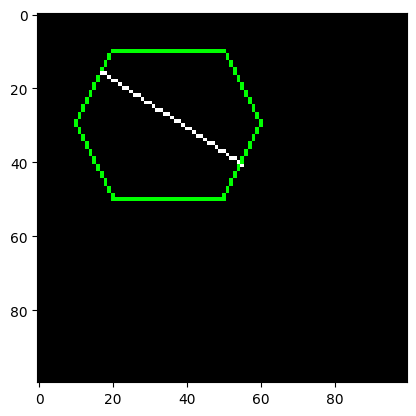

In [12]:
from posixpath import normcase
from PIL import Image
import matplotlib.pyplot as plt
import PIL.ImageDraw as ID, PIL.Image as Image
import numpy as np

image = Image.new("RGB", (100, 100))

def Bresenham(x0,y0,x1,y1, fill):
  e=0
  is_steep = abs(y1-y0) > abs(x1-x0)
  if is_steep:
    temp = x0
    x0 = y0
    y0 = temp
    temp1 = x1
    x1 = y1
    y1 = temp1
  if x0 > x1:
   temp2 = x0
   x0 = x1
   x1 = temp2
   temp3 = y0
   y0 = y1
   y1 = temp3
  cur_y=y0
  for i in range(x0,x1+1):
    e=e+2*abs(y1-y0)
    if e > abs(x1-x0):
     e=e-2*abs(x1-x0)
     if y1>y0:
        cur_y+=1
     elif y1<y0:
       cur_y-=1
     else:
       cur_y = y0
    if is_steep:
      image.putpixel((cur_y,i),fill)
    else:
     image.putpixel((i,cur_y),fill)

def dot(x1, y1, x2, y2):
    return x1 * x2 + y1 * y2


def CyrusBeckLineClipping(x1, y1, x2, y2, vertices, n):
    normal=[[0]*2 for i in range(n)]

    for i in range(0, n):
        normal[i][1] = vertices[(i + 1) % n][0] - vertices[i][0]
        normal[i][0] = vertices[i][1] - vertices[(i + 1) % n][1]

    dx = x2 - x1
    dy = y2 - y1

    dp1e=[[0]*2 for i in range(n)]

    for i in range(0, n):
        dp1e[i][0] = vertices[i][0] - x1
        dp1e[i][1] = vertices[i][1] - y1

    numerator=[0]*n
    denominator=[0]*n

    for i in range(0, n):
        numerator[i] = dot(normal[i][0], normal[i][1], dp1e[i][0], dp1e[i][1])
        denominator[i] = dot(normal[i][0], normal[i][1], dx, dy)

    t=[0]*n

    tE = np.array([0])
    tL = np.array([1])

    for i in range(0, n):
        t[i] = float(numerator[i]) / float(denominator[i])
        if denominator[i] > 0:
            tE = np.append(tE, t[i])
        else:
            tL = np.append(tL, t[i])

    temp0 = np.amax(tE)
    temp1 = np.amin(tL)

    if temp0 > temp1:
        return

    New_X1 = float(x1) + float(dx) * float(temp0)
    New_Y1 = float(y1) + float(dy) * float(temp0)
    New_X2 = float(x1) + float(dx) * float(temp1)
    New_Y2 = float(y1) + float(dy) * float(temp1)
    Bresenham(int(New_X1), int(New_Y1), int(New_X2), int(New_Y2), (255,255,255))

if __name__ == '__main__':
    n = int(input("n: "))
    i=0
    vertices=[[0]*2 for i in range(0,n)]
    for i in range(0,n):
      x=int(input("x: "))
      y=int(input("y: "))
      vertices[i]=(x,y)
    x1 = int(input("x1: "))
    y1 = int(input("y1: "))
    x2 = int(input("x2: "))
    y2 = int(input("y2: "))
    for i in range(0,n-1):
      Bresenham(vertices[i][0], vertices[i][1],vertices[i+1][0],vertices[i+1][1],(0,255,0))
    Bresenham(vertices[n-1][0], vertices[n-1][1],vertices[0][0],vertices[0][1],(0,255,0))
    CyrusBeckLineClipping(x1, y1, x2, y2, vertices, n)
    plt.imshow(image)